# Doing Bayesian Data Analysis

Simple example from __Chapter 16__.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

# Kruschke's light blue color
sns.set_palette(["#87ceeb"])
sns.set_context("talk")

In [2]:
df = pd.read_csv("data/TwoGroupIQ.csv")
# Only work with the "Smart Drug" group
smart = df[df.Group == "Smart Drug"]

print len(smart)
smart.head()

63


,Score,Group
0,102,Smart Drug
1,107,Smart Drug
2,92,Smart Drug
3,101,Smart Drug
4,110,Smart Drug


In [3]:
with pm.Model() as model:
    # Priors
    sigma = pm.HalfCauchy("sigma", 25)  # Gelman 2006
    mu = pm.Normal("mu", mu=0, tau=1E-8)
    nu = pm.Exponential("nu", 1.0 / 29)   # Taken from the book
    # Likelihood
    y = pm.StudentT("y", nu=nu, mu=mu, sd=sigma, observed=smart.Score)
    # Sample
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(10000, step, start)
    
burn_in = 5000
trace = trace[burn_in:]

Optimization terminated successfully.
         Current function value: 301.760587
         Iterations: 26
         Function evaluations: 33
         Gradient evaluations: 33


100%|██████████| 10000/10000 [01:35<00:00, 104.50it/s]


             mean         sd  mc_error     hpd_2.5    hpd_97.5
mu     107.239422   2.845241  0.049164  101.916159  112.845576
sigma   19.618054   3.457055  0.125166   12.778531   26.132669
nu       9.202046  11.575102  0.576988    0.977588   31.349807


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e804dd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11eb230d0>]], dtype=object)

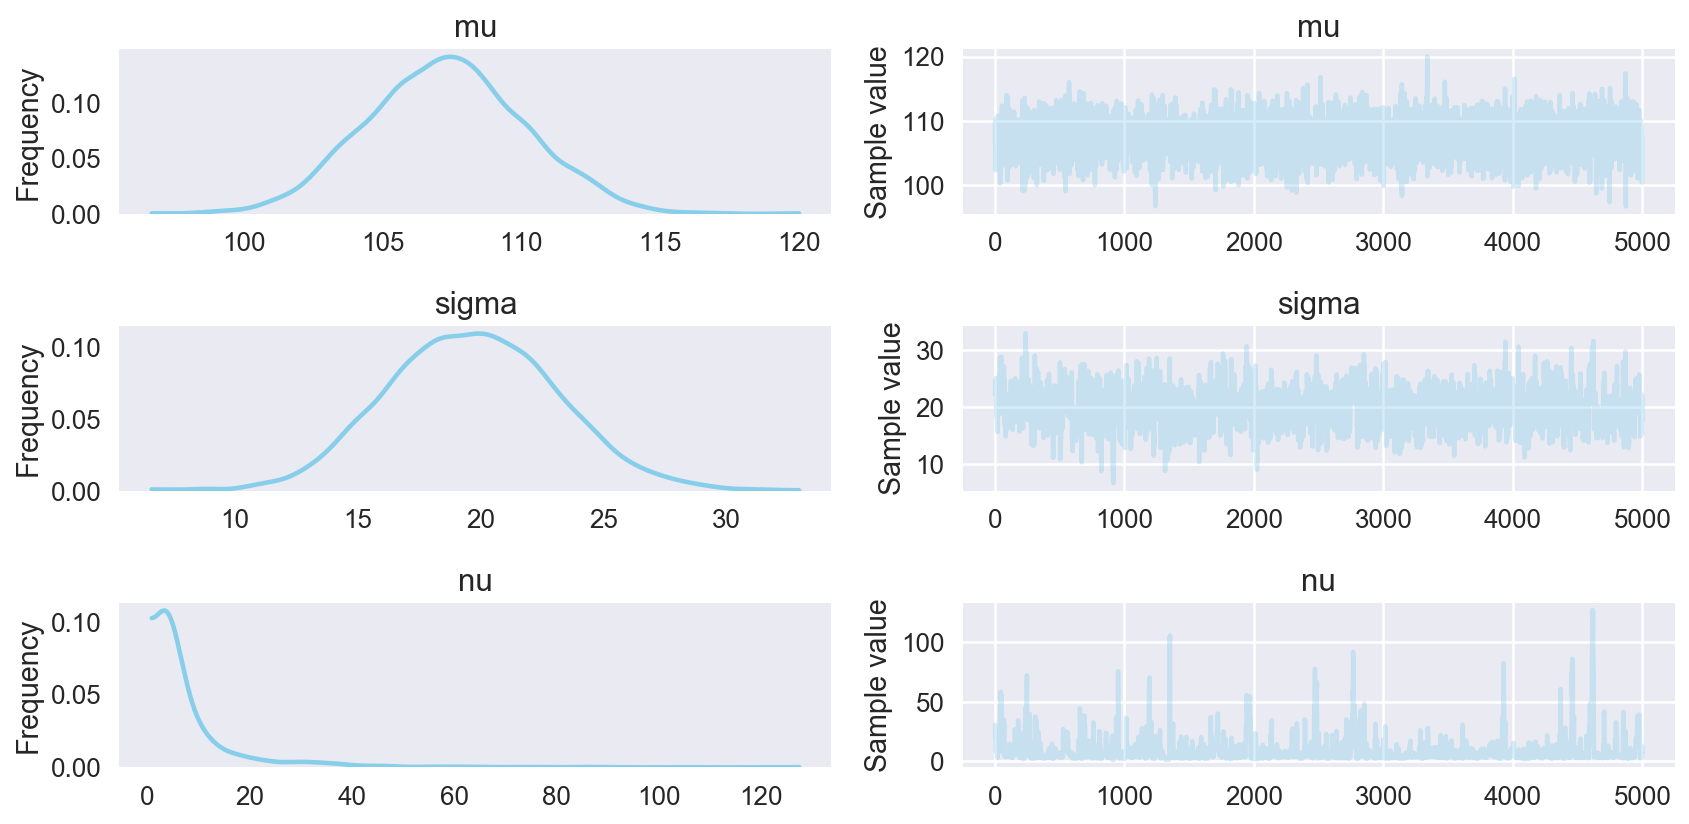

In [4]:
print(pm.df_summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ed3bbd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11fe99250>], dtype=object)

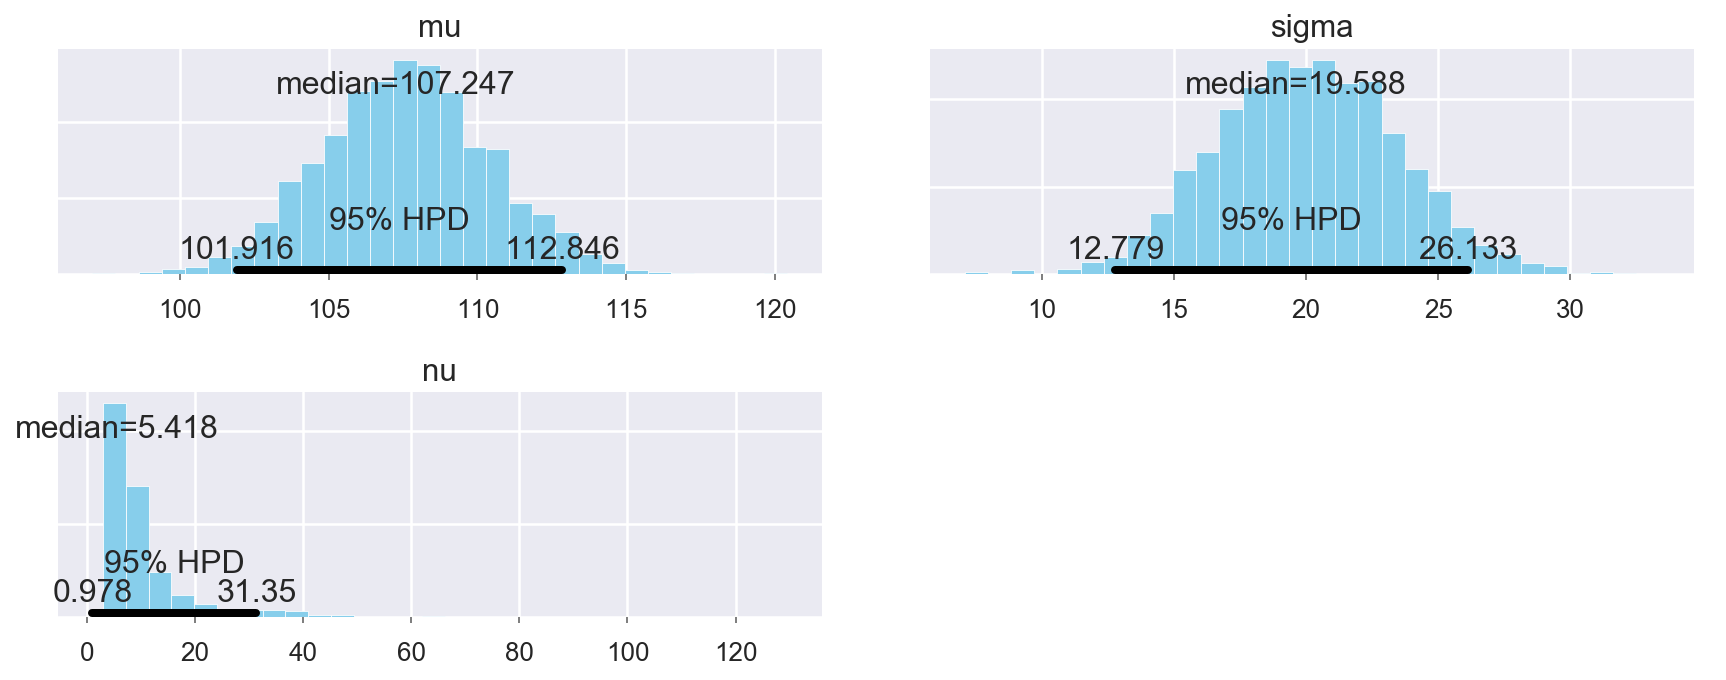

In [5]:
pm.plot_posterior(trace, point_estimate="median")

## Two Groups

Create a model for both `Smart Drug` and `Placebo` groups.

In [11]:
df["label"] = (df.Group == "Smart Drug").astype(int)
df.head()

,Score,Group,label
0,102,Smart Drug,1
1,107,Smart Drug,1
2,92,Smart Drug,1
3,101,Smart Drug,1
4,110,Smart Drug,1


In [12]:
n_groups = 2
with pm.Model() as model_two:
    # Priors
    sigma = pm.HalfCauchy("sigma", 25, shape=n_groups)
    mu = pm.Normal("mu", mu=0, tau=1E-8, shape=n_groups)
    nu = pm.Gamma("nu", 2, .1)  # Recommendation from Stan docs
    # Likelihood
    y = pm.StudentT("y", nu=nu, mu=mu[df.label], sd=sigma[df.label], observed=df.Score)
    # Sample
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(10000, step, start)
    
burn_in = 5000
trace = trace[burn_in:]

Optimization terminated successfully.
         Current function value: 548.902998
         Iterations: 36
         Function evaluations: 44
         Gradient evaluations: 44


100%|██████████| 10000/10000 [03:21<00:00, 49.70it/s]


                mean        sd  mc_error     hpd_2.5    hpd_97.5
mu__0      99.281938  1.744706  0.022391   96.002833  102.845762
mu__1     107.227120  2.647191  0.034445  101.894456  112.343367
sigma__0   11.527888  1.756376  0.048465    8.128958   15.026065
sigma__1   18.078818  2.694745  0.079409   13.217363   23.832896
nu          4.222437  1.816076  0.075500    1.653680    7.510162


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126c81550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126f3b3d0>]], dtype=object)

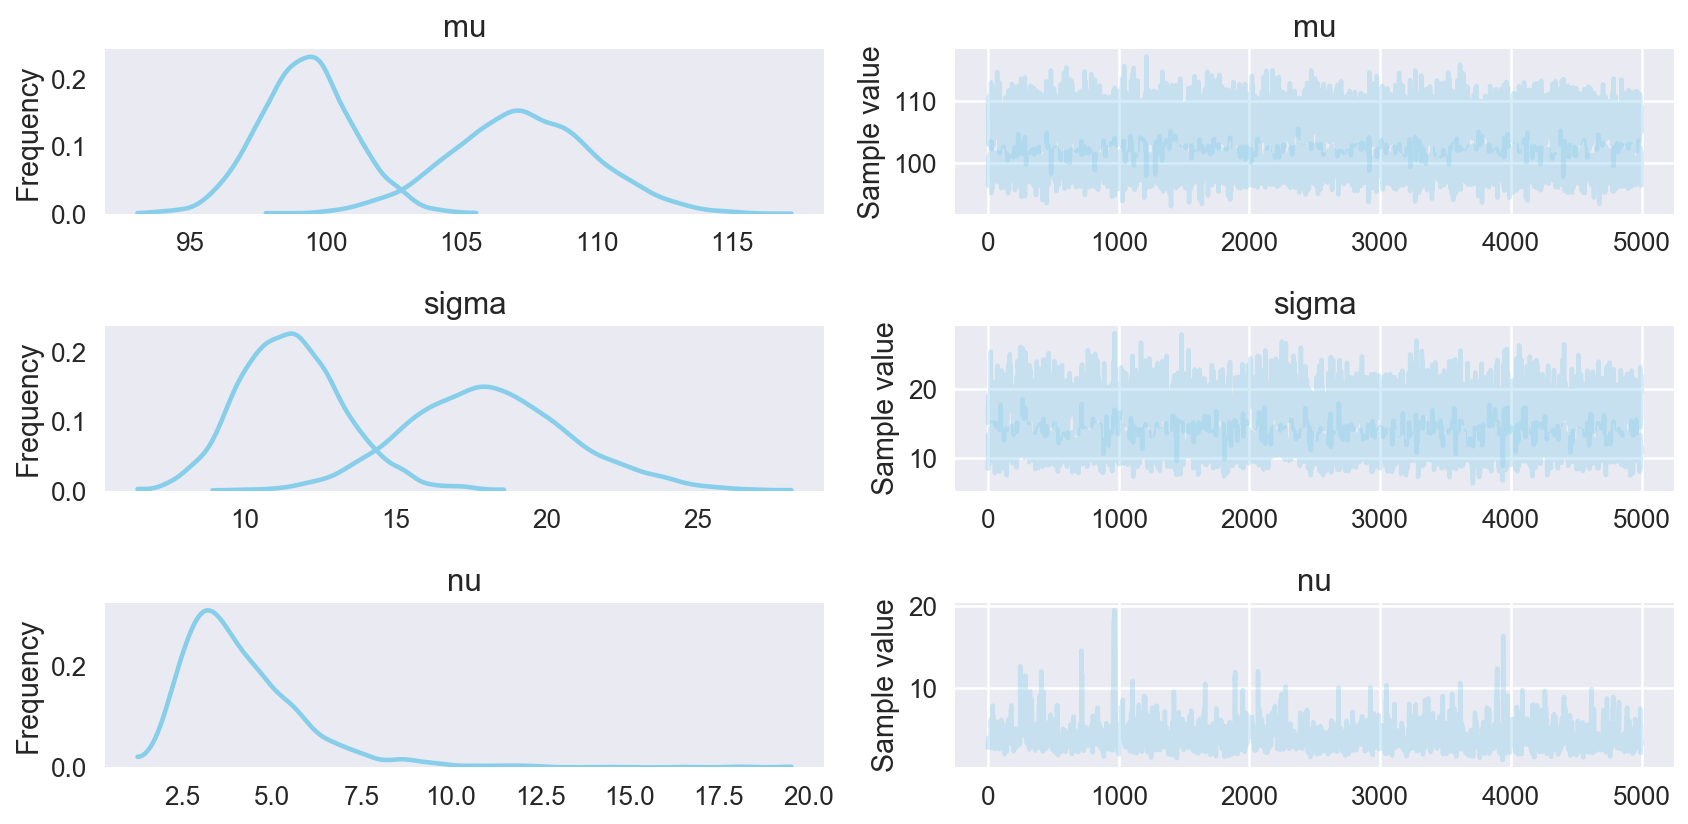

In [13]:
print(pm.df_summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d973190>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x120ba7d90>], dtype=object)

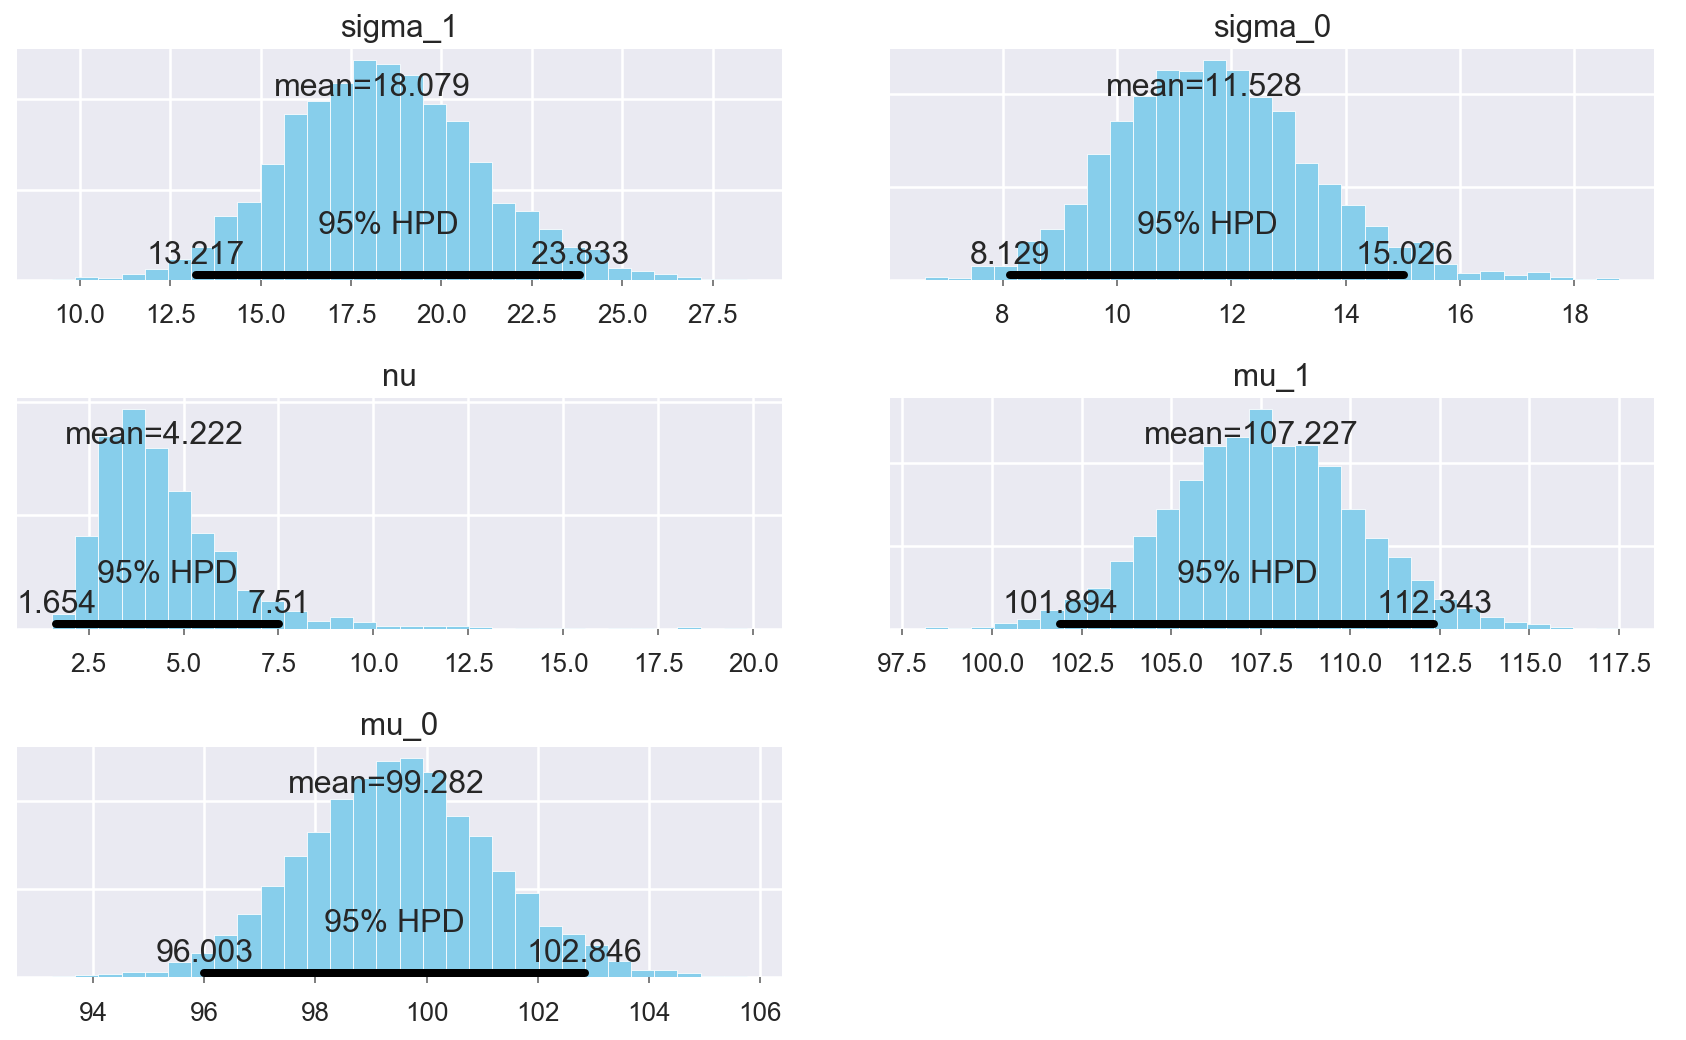

In [21]:
varnames = ["mu", "sigma", "nu"]
pm.plot_posterior(trace, varnames=varnames)